# Data Cleaning and Preprocessing Tutorial

## Introduction
In this tutorial, we will explore various data cleaning and preprocessing techniques using the "Adult" dataset from scikit-learn. The dataset contains demographic information about individuals, and the goal is to predict whether their income exceeds $50,000 per year.

We will cover the following topics:
1. Loading the dataset
2. Handling missing values
3. Encoding categorical variables
4. Feature scaling
5. Handling imbalanced classes

Let's get started!

## Loading the Dataset

First, we'll load the "Adult" dataset using scikit-learn's `fetch_openml` function.


In [709]:
from sklearn.datasets import fetch_openml

In [710]:
data = fetch_openml(data_id=1590, as_frame=True)
X = data.data
y = data.target

In [711]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [712]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: category
Categories (2, object): ['<=50K', '>50K']

## Handling Missing Values

In [713]:
X.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [714]:
y.isnull().sum()

0

We can see that there are missing values in the dataset, represented by the '?' character. Let's replace them with NaN values.


In [715]:
X = X.replace('?', float('nan'))

In [716]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [717]:
X.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
dtype: object

In [718]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X[['workclass', 'occupation', 'native-country']] = imputer.fit_transform(X[['workclass', 'occupation', 'native-country']])

## Handling outliers

In [719]:
X.dtypes

age                  int64
workclass           object
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation          object
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
dtype: object

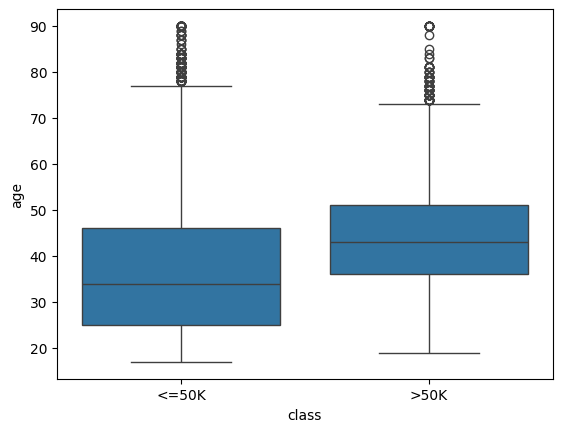

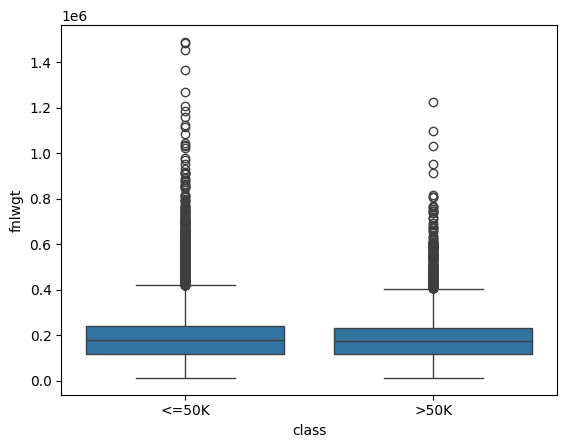

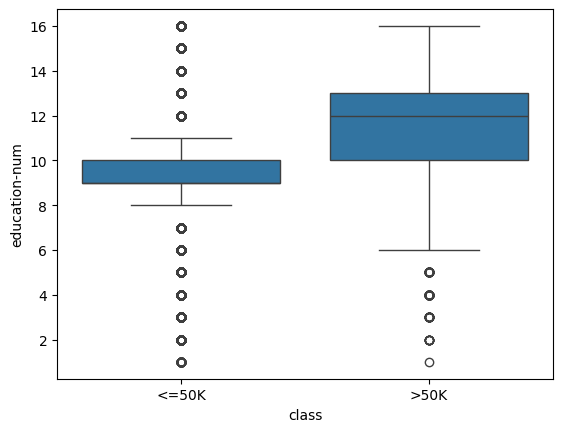

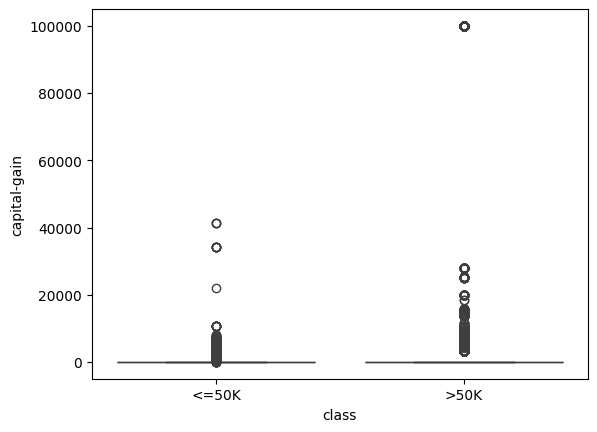

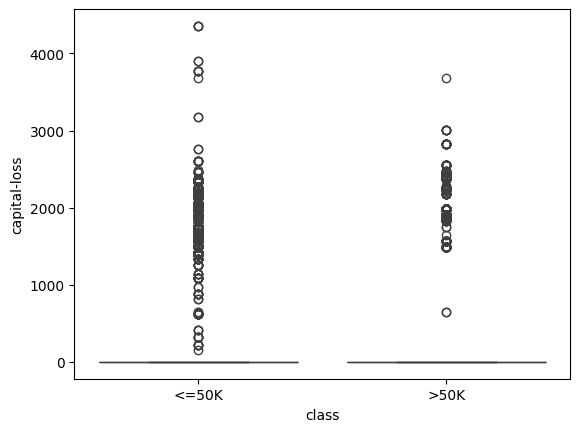

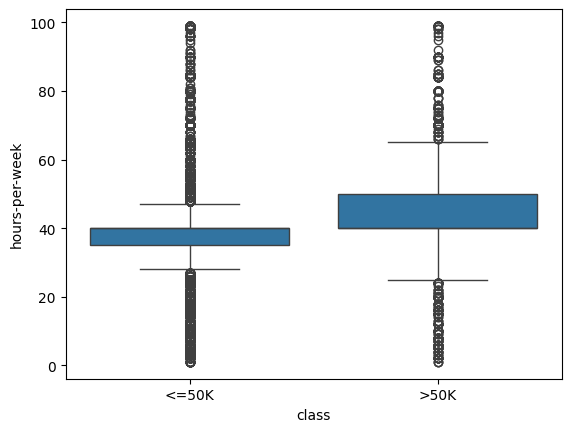

In [720]:
# Boxplots 1 by 1
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = X.select_dtypes(include=['int64']).columns

for col in X.columns:
    if col in numerical_features:
        sns.boxplot(x=y, y=X[col])
        plt.show()

In [721]:
import numpy as np

# # Apply log transformation to numerical features
# for feature in numerical_features:
#     X[feature] = np.log(X[feature] + 1)

from scipy.stats import mstats

# Apply winsorization to numerical features
for feature in numerical_features:
    X[feature] = mstats.winsorize(X[feature], limits=[0.10, 0.10])

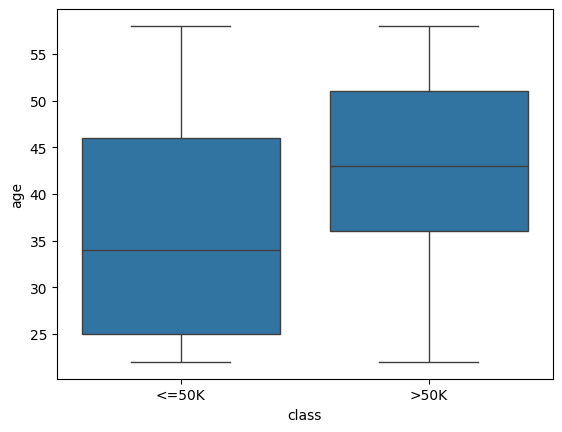

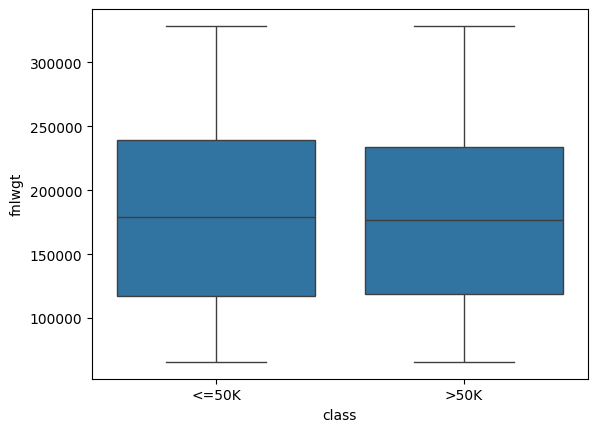

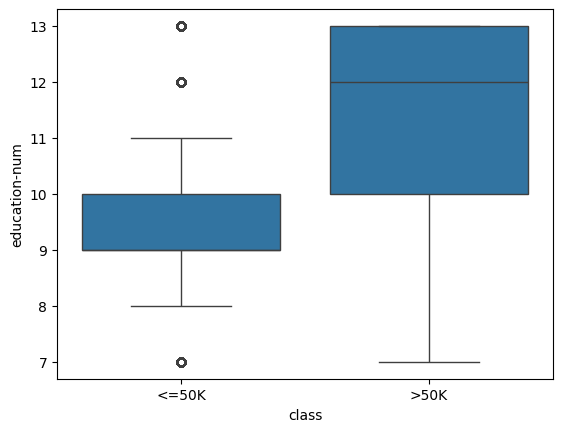

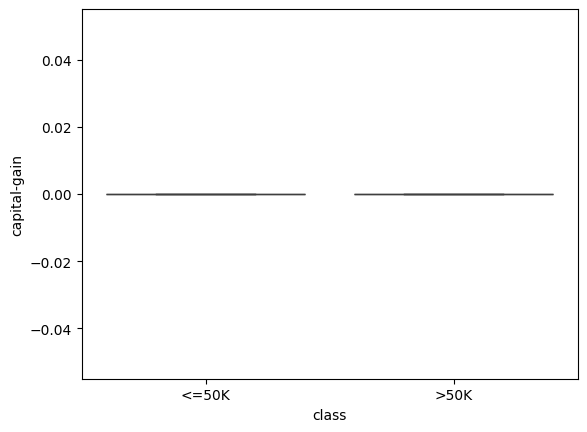

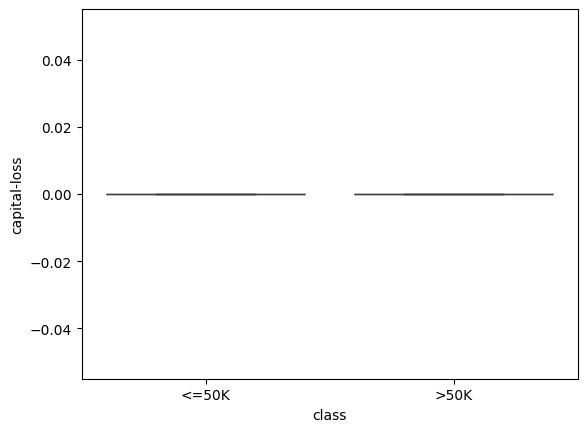

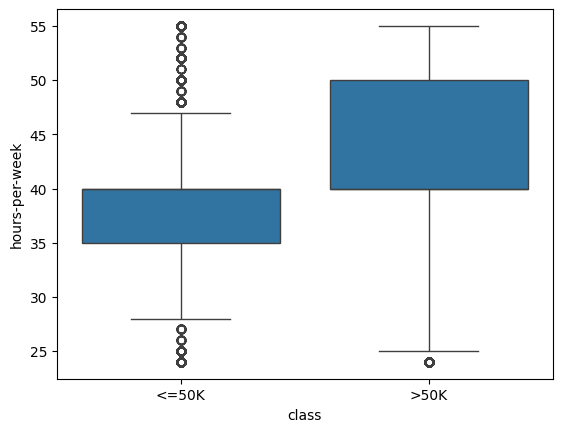

In [722]:
for col in X.columns:
    if col in numerical_features:
        sns.boxplot(x=y, y=X[col])
        plt.show()

## Encoding Categorical Variables

### Ordinal Encoding

In [723]:
X['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [724]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['education']
ordinal_encoder = OrdinalEncoder()
X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])

# y to dataframe
y = y.to_frame()
y_column_names = y.columns
y = ordinal_encoder.fit_transform(y)

In [725]:
X['education'].value_counts()

education
11.0    15784
15.0    10878
9.0      8025
12.0     2657
8.0      2061
1.0      1812
7.0      1601
0.0      1389
5.0       955
14.0      834
6.0       756
2.0       657
10.0      594
4.0       509
3.0       247
13.0       83
Name: count, dtype: int64

### One-Hot Encoding

In [726]:
len(X.columns)

14

In [727]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

nominal_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
onehot_encoder = OneHotEncoder()
X_onehot_encoded = onehot_encoder.fit_transform(X[nominal_features])
X_onehot_encoded_df = pd.DataFrame(X_onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

# Drop original nominal columns
X.drop(columns=nominal_features, axis=1, inplace=True)

X = pd.concat([X, X_onehot_encoded_df], axis=1)

In [728]:
len(X.columns)

90

In [729]:
X.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,1.0,7,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,11.0,9,0,0,50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,328466,7.0,12,0,0,40,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,15.0,10,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22,103497,15.0,10,0,0,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [730]:
len(X.columns[X.dtypes == 'object'])

0

In [731]:
len(X.columns[X.dtypes != 'object'])

90

## Feature Scaling

To ensure fair comparison and contribution of features, we'll scale the numerical features.

In [732]:
from sklearn.preprocessing import StandardScaler

# Ideally, we should analyze the distribution of each feature and select the appropriate scaling method
# (e.g., StandardScaler for Gaussian-like features, MinMaxScaler for non-Gaussian features)
# In this example, we'll use StandardScaler for all numerical features for simplicity
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled.tolist(), columns=X.columns)

y_scaled = scaler.fit_transform(y)
y = pd.DataFrame(y_scaled.tolist(), columns=y_column_names)

In [733]:
X.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.109947,0.528095,-2.397350,-1.610902,0.0,0.0,-0.038921,-0.173795,-0.261940,-0.01431,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705
1,-0.016286,-1.160144,0.183660,-0.587546,0.0,0.0,1.135750,-0.173795,-0.261940,-0.01431,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705
2,-0.857563,1.781001,-0.848744,0.947487,0.0,0.0,-0.038921,-0.173795,3.817672,-0.01431,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705
3,0.488481,-0.291191,1.216063,-0.075869,0.0,0.0,-0.038921,-0.173795,-0.261940,-0.01431,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705
4,-1.362330,-0.991514,1.216063,-0.075869,0.0,0.0,-1.213591,-0.173795,-0.261940,-0.01431,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.304846,-0.041999,-0.021705


In [734]:
y.head()

,class
0,-0.560845
1,-0.560845
2,1.783024
3,1.783024
4,-0.560845
